In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../')
from utils import *

pd.set_option('display.max_columns', None)

In [2]:
WYSCOUT_ID = 5414111
SKILLCORNER_ID = 952209

In [3]:
DATA_PATH = f'../../data/networks/match_{SKILLCORNER_ID}/'
PASSES_DF_PATH = DATA_PATH + 'passes_df.pkl'

In [4]:
passes_df = pd.read_pickle(PASSES_DF_PATH)

In [5]:
pass_location_x, pass_location_y = 0, 0
pass_end_location_x, pass_end_location_y = 10, 10

In [6]:
def get_pass_responsibility(x, y, defender_speed=6.0, ball_speed=12.0):
    # Pass and defender vectors
    pass_vector = np.array([
        pass_end_location_x - pass_location_x,
        pass_end_location_y - pass_location_y
    ])
    defender_vector = np.array([
        x - pass_location_x,
        y - pass_location_y
    ])
    
    # Norms
    pass_length = np.linalg.norm(pass_vector)
    defender_distance = np.linalg.norm(defender_vector)
    
    if defender_distance == 0:
        return 0.0
    
    # Cosine of the angle between the vectors
    cos_theta = np.dot(pass_vector, defender_vector) / (pass_length * defender_distance)
    cos_theta = np.clip(cos_theta, -1.0, 1.0)
    
    # If defender is behind the passer
    if cos_theta < 0:
        return 0.0
    
    # Projection length of defender onto pass vector
    projection_length = defender_distance * cos_theta
    
    if projection_length > pass_length:
        # Defender is behind the receiver
        
        # Distance from defender to receiver
        defender_to_receiver_distance = np.linalg.norm([
            x - pass_end_location_x,
            y - pass_end_location_y
        ])
        
        ratio = defender_to_receiver_distance / pass_length
        responsibility = 1 - (ratio * ball_speed / defender_speed)
        return max(responsibility, 0)
    
    # Angle theta
    theta = np.arccos(cos_theta)
    
    # Responsibility calculation
    responsibility = 1 - (np.tan(theta) * ball_speed / defender_speed)
    return max(responsibility, 0)

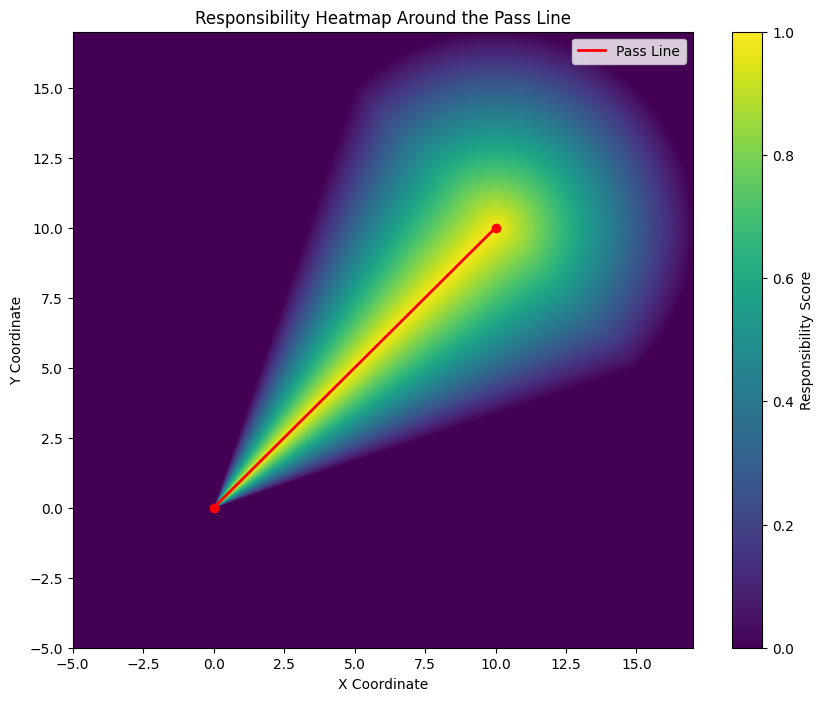

In [15]:
# Define the pass coordinates
pass_location_x, pass_location_y = 0,0  
pass_end_location_x, pass_end_location_y = 10,10  

# Generate a grid of points around the pass line
grid_size = 1000  # Adjust the grid size as needed
x_min = min(pass_location_x, pass_end_location_x) - 5
x_max = max(pass_location_x, pass_end_location_x) + 7
y_min = min(pass_location_y, pass_end_location_y) - 5
y_max = max(pass_location_y, pass_end_location_y) + 7
x_range = np.linspace(x_min, x_max, grid_size)
y_range = np.linspace(y_min, y_max, grid_size)
X, Y = np.meshgrid(x_range, y_range)

# Compute responsibility scores for each point in the grid
responsibility_scores = np.zeros_like(X)
for i in range(grid_size):
    for j in range(grid_size):
        x = X[j, i]
        y = Y[j, i]
        responsibility_scores[j, i] = get_pass_responsibility(x, y)

# Plot the heatmap
plt.figure(figsize=(10, 8))
extent = [x_min, x_max, y_min, y_max]
plt.imshow(responsibility_scores, origin='lower', extent=extent, cmap='viridis', aspect='auto')
plt.colorbar(label='Responsibility Score')
plt.plot(
    [pass_location_x, pass_end_location_x],
    [pass_location_y, pass_end_location_y],
    color='red',
    linewidth=2,
    label='Pass Line'
)
plt.scatter(
    [pass_location_x, pass_end_location_x],
    [pass_location_y, pass_end_location_y],
    color='red'
)
plt.title('Responsibility Heatmap Around the Pass Line')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.show()

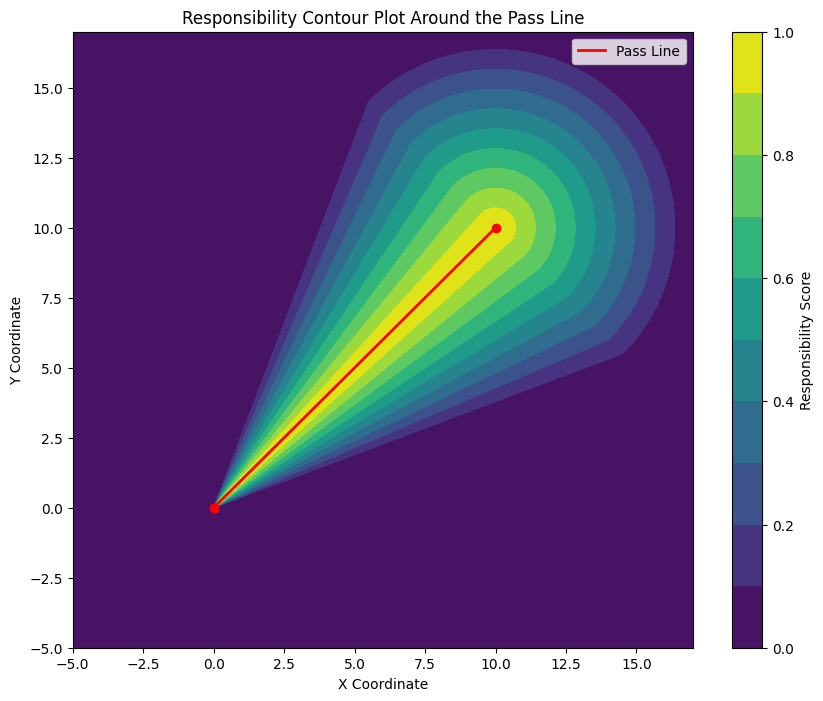

In [12]:
# Define the pass coordinates
pass_location_x, pass_location_y = 0, 0
pass_end_location_x, pass_end_location_y = 10, 10

# Generate a grid of points around the pass line
grid_size = 1000  # Adjust the grid size as needed
x_min = min(pass_location_x, pass_end_location_x) - 5
x_max = max(pass_location_x, pass_end_location_x) + 7
y_min = min(pass_location_y, pass_end_location_y) - 5
y_max = max(pass_location_y, pass_end_location_y) + 7
x_range = np.linspace(x_min, x_max, grid_size)
y_range = np.linspace(y_min, y_max, grid_size)
X, Y = np.meshgrid(x_range, y_range)

# Compute responsibility scores for each point in the grid
responsibility_scores = np.zeros_like(X)
for i in range(grid_size):
    for j in range(grid_size):
        x = X[j, i]
        y = Y[j, i]
        responsibility_scores[j, i] = get_pass_responsibility(x, y)

# Create a contour plot
plt.figure(figsize=(10, 8))
contour_levels = np.linspace(0, 1, 11)  # Adjust levels as needed
cp = plt.contourf(X, Y, responsibility_scores, levels=contour_levels, cmap='viridis')
plt.colorbar(cp, label='Responsibility Score')
plt.plot(
    [pass_location_x, pass_end_location_x],
    [pass_location_y, pass_end_location_y],
    color='red',
    linewidth=2,
    label='Pass Line'
)
plt.scatter(
    [pass_location_x, pass_end_location_x],
    [pass_location_y, pass_end_location_y],
    color='red'
)
plt.title('Responsibility Contour Plot Around the Pass Line')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.show()

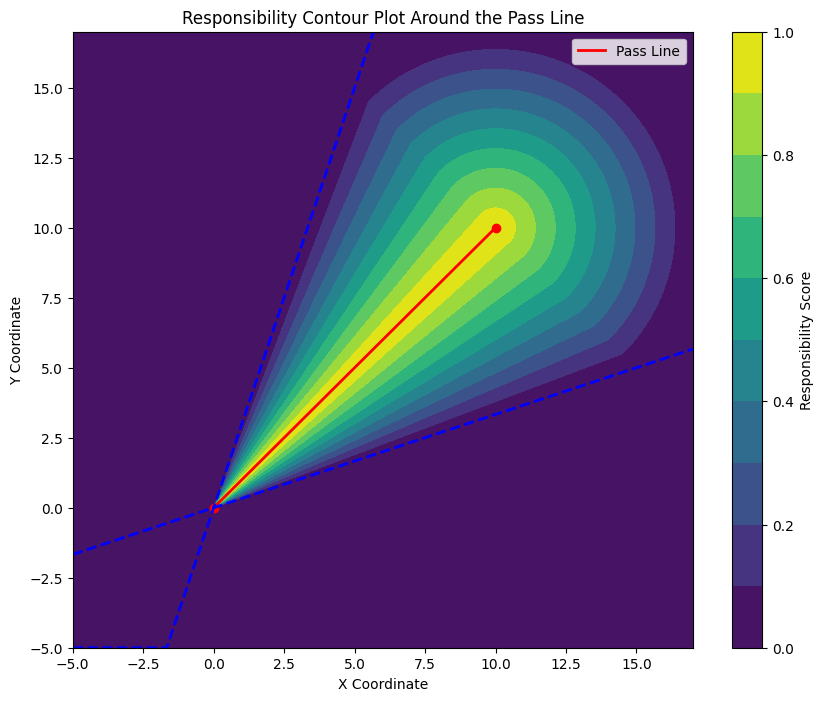

In [14]:
# Define the pass coordinates
pass_location_x, pass_location_y = 0, 0
pass_end_location_x, pass_end_location_y = 10, 10

# Generate a grid of points around the pass line
grid_size = 1000  # Adjust the grid size as needed
x_min = min(pass_location_x, pass_end_location_x) - 5
x_max = max(pass_location_x, pass_end_location_x) + 7
y_min = min(pass_location_y, pass_end_location_y) - 5
y_max = max(pass_location_y, pass_end_location_y) + 7
x_range = np.linspace(x_min, x_max, grid_size)
y_range = np.linspace(y_min, y_max, grid_size)
X, Y = np.meshgrid(x_range, y_range)

# Compute responsibility scores for each point in the grid
responsibility_scores = np.zeros_like(X)
for i in range(grid_size):
    for j in range(grid_size):
        x = X[j, i]
        y = Y[j, i]
        responsibility_scores[j, i] = get_pass_responsibility(x, y)

# Create a contour plot
plt.figure(figsize=(10, 8))
contour_levels = np.linspace(0, 1, 11)  # Adjust levels as needed
cp = plt.contourf(X, Y, responsibility_scores, levels=contour_levels, cmap='viridis')
plt.colorbar(cp, label='Responsibility Score')
plt.plot(
    [pass_location_x, pass_end_location_x],
    [pass_location_y, pass_end_location_y],
    color='red',
    linewidth=2,
    label='Pass Line'
)
plt.scatter(
    [pass_location_x, pass_end_location_x],
    [pass_location_y, pass_end_location_y],
    color='red'
)
plt.title('Responsibility Contour Plot Around the Pass Line')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()


# Compute the maximum angle theta
player_speed = 6.0
ball_speed = 12.0
max_theta = np.arctan(player_speed / ball_speed)

# Compute the line corresponding to the maximum angle with respect to the pass vector
pass_vector = np.array([pass_end_location_x - pass_location_x, pass_end_location_y - pass_location_y])
pass_angle = np.arctan2(pass_vector[1], pass_vector[0])

# Compute the line points
x_line = np.linspace(x_min, x_max, 100)
y_line_negative = np.tan(pass_angle - max_theta) * (x_line - pass_location_x) + pass_location_y
y_line_negative = np.clip(y_line_negative, y_min, y_max)
y_line_positive = np.tan(pass_angle + max_theta) * (x_line - pass_location_x) + pass_location_y
y_line_positive = np.clip(y_line_positive, y_min, y_max)

# Plot the maximum angle lines
plt.plot(x_line, y_line_negative, color='blue', linestyle='--', linewidth=2, label='Responsibility Limit')
plt.plot(x_line, y_line_positive, color='blue', linestyle='--', linewidth=2)

plt.show()